In [2]:
#import dependencies

import pandas as pd
# settings to display all columns
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets
from scipy import stats
from scipy.stats import linregress


#datafiles

salary_demog = "Sql Data/employee_salary_demographic.csv"

#read into panda

salary_demog = pd.read_csv(salary_demog)

salary_demog


,employee_no,position,department,status,flsa_status,post_education,school,race_desc,state,zip,age,sex
0,1301052347,Sr. Network Engineer,IT/IS,Active,Exempt,Bachelors,New York University,Asian,MA,2453,39,Female
1,1108028108,Sr. Network Engineer,IT/IS,Active,Exempt,Bachelors,Boston College,White,MA,2169,31,Male
2,1411071312,Sr. Network Engineer,IT/IS,Active,Exempt,Bachelors,Pennsylvania State University,White,CT,6033,66,Female
3,1308060959,Sr. Network Engineer,IT/IS,Active,Exempt,Associates,Lakeland Community College,White,CT,6278,52,Male
4,1308060959,Sr. Network Engineer,IT/IS,Active,Exempt,Associates,Lakeland Community College,White,CT,6278,52,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
239,1103024456,Accountant I,Admin Offices,Active,Exempt,Bachelors,New York University,White,MA,1450,32,Female
240,1103024456,Accountant I,Admin Offices,Active,Exempt,Bachelors,New York University,White,MA,1450,32,Female
241,1106026572,Accountant I,Admin Offices,Active,Exempt,Associates,New York University,Black or African American,MA,1460,33,Male
242,1106026572,Accountant I,Admin Offices,Active,Exempt,Associates,New York University,White,MA,1460,33,Male


In [3]:
#Drop Duplicates
salary_demog.drop_duplicates(subset=['employee_no'], keep='first', inplace=True)
salary_demog

,employee_no,position,department,status,flsa_status,post_education,school,race_desc,state,zip,age,sex
0,1301052347,Sr. Network Engineer,IT/IS,Active,Exempt,Bachelors,New York University,Asian,MA,2453,39,Female
1,1108028108,Sr. Network Engineer,IT/IS,Active,Exempt,Bachelors,Boston College,White,MA,2169,31,Male
2,1411071312,Sr. Network Engineer,IT/IS,Active,Exempt,Bachelors,Pennsylvania State University,White,CT,6033,66,Female
3,1308060959,Sr. Network Engineer,IT/IS,Active,Exempt,Associates,Lakeland Community College,White,CT,6278,52,Male
8,904013591,Sr. Network Engineer,IT/IS,Active,Exempt,Bachelors,University of Massachusetts Boston,Asian,MA,1545,34,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1203032099,Area Sales Manager,Sales,Active,Exempt,Associates,Valpariaso University,White,IN,46204,28,Female
187,1411071302,Area Sales Manager,Sales,Active,Exempt,Associates,Cuyahoga Community College,White,CT,6050,54,Male
235,1302053333,Accountant I,Admin Offices,Active,Exempt,Bachelors,Cornell University,White,MA,2703,31,Male
236,1103024456,Accountant I,Admin Offices,Active,Exempt,Bachelors,New York University,Black or African American,MA,1450,32,Female


In [4]:
salary_employees_race = pd.DataFrame(pd.value_counts(salary_demog["race_desc"]))
salary_employees_race

,race_desc
White,71
Asian,10
Black or African American,4
Hispanic,2
American Indian or Alaska Native,1


<function matplotlib.pyplot.show(close=None, block=None)>

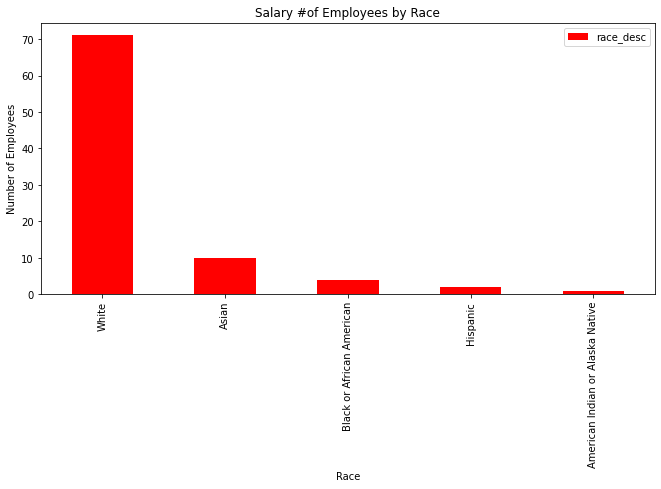

In [5]:
salary_employees_race.plot(kind="bar", color="r", figsize=(11,5))
plt.title("Salary #of Employees by Race")
plt.xlabel("Race")
plt.ylabel("Number of Employees")
plt.savefig("Plots/Salary Positions x Race")
plt.show

In [6]:
salary_employees_gender = pd.DataFrame(pd.value_counts(salary_demog["sex"]))
salary_employees_gender

,sex
Male,45
Female,43


<function matplotlib.pyplot.show(close=None, block=None)>

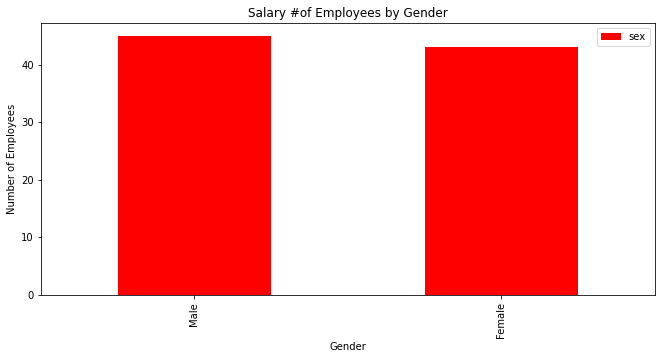

In [7]:
salary_employees_gender.plot(kind="bar", color="r", figsize=(11,5))
plt.title("Salary #of Employees by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.savefig("Plots/Salary # Positions x Gender")
plt.show


TypeError: float() argument must be a string or a number, not 'method'

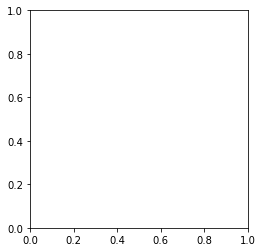

In [8]:
salary_position = salary_demog["position"].unique
salary_gender = salary_demog["sex"].unique
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
explode = (0.1,0.1,0.1,0.1)
plt.pie(salary_position, labels=salary_gender, explode=explode, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Positions by Gender")
plt.show